<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predecir Sobrevivientes del Titanic**

In [58]:
import pandas as pd

In [59]:
#Utilizaremos el mismo dataset del laboratorio anterior
df = pd.read_csv('/content/titanic.csv', index_col=0)

# Limpieza de datos

In [60]:
print('------------------------------')
print('(Filas, Columnas) = ',df.shape)
print('------------------------------')
print('Tamaño del dataframe: ',df.size)
print('------------------------------')
print('Nombre de las columnas: ')
list(df.columns)

------------------------------
(Filas, Columnas) =  (1309, 12)
------------------------------
Tamaño del dataframe:  15708
------------------------------
Nombre de las columnas: 


['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [61]:
#Reemplazamos datos faltantes en Edad por su promedio, omitiendo los datos nulos:
df['Age']=df['Age'].fillna(df['Age'].mean(skipna = True))

In [62]:
#Datos faltantes ajustado Age:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [63]:
#Eliminamos la columna Cabin:
df = df.drop(['Cabin'],axis=1)

In [64]:
#Datos faltantes eliminado Cabin:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
Survived       0
dtype: int64

In [65]:
#Eliminamos todo el resto de filas donde hay datos nulos:
df=df.dropna()

In [66]:
#Datos faltantes eliminado NA en Fare y Embarked:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [67]:
#Revisamos las variables
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0


In [68]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived         int64
dtype: object

No nos interesa para la predicción:
- El nombre del pasajero
- El ID del pasajero
- El número de ticket

In [69]:
#Eliminamos Name, PassengerId y Ticket
df = df.drop(['PassengerId'],axis=1)
df = df.drop(['Name'],axis=1)
df = df.drop(['Ticket'],axis=1)

In [70]:
#Convertimos la variable Pclass a object para poder hacerla Dummy
df['Pclass'] = df['Pclass'].astype('object')

In [71]:
df['Pclass'].head()

0    3
1    3
2    2
3    3
4    3
Name: Pclass, dtype: object

# **Separar dataframe en Train y Test**

In [72]:
#Importamos librería para separar set de datos
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [73]:
#Pasamos las variables categóricas a dummies
df_categoricas = df.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df_categoricas, drop_first=True)
df_dummies.head(3)

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,False,True,True,True,False
1,False,True,False,False,True
2,True,False,True,True,False


In [74]:
df_dummies = pd.get_dummies(df_categoricas, drop_first=True).astype(int)
df_dummies.head(3)

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,1,1,0


In [75]:
#Seleccionamos las variables numéricas del set de datos:
df_numericas = df.select_dtypes(include=['float64','int64'])

In [76]:
#Agrupamos las variables numéricas con dummies
df_final = pd.concat([df_numericas, df_dummies], axis=1)

In [77]:
#Definimos X e Y
X = df_final.drop(['Survived'], axis=1)
Y = df_final['Survived']

In [78]:
# Definimos la semilla a utilizar
semilla = 42

#Set de entrenamiento con 20% de testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=semilla)

# **Regresión Logística**

In [79]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [95]:
#Instanciar modelo
model_rlog = LogisticRegression()

In [96]:
#Entrenamiento
model_rlog.fit(X_train, Y_train)

LogisticRegression()

In [97]:
#Predecimos los valores de Y en el set de testeo
Y_pred = model_rlog.predict(X_test)

In [99]:
#Intercepto del modelo
model_rlog.intercept_

array([3.75712152])

In [100]:
#Coeficientes del modelo
pd.DataFrame(model_rlog.coef_[0], X.columns,
            columns=['coeficiente'])

,coeficiente
Age,-0.030518
SibSp,-0.192693
Parch,-0.134676
Fare,0.003670
Pclass_2,-0.673163
Pclass_3,-1.656050
Sex_male,-3.523473
Embarked_Q,0.207494
Embarked_S,-0.405865


# **Matriz de Confusión**

In [86]:
#Importamos librería para Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [101]:
matriz = confusion_matrix(Y_test, Y_pred)

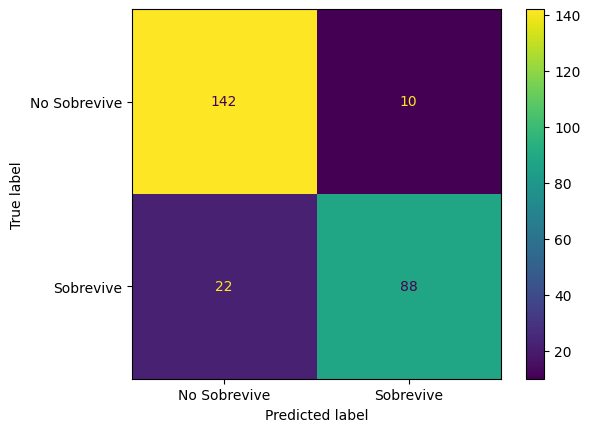

In [102]:
#Graficamos matriz de confusion
class_names = ['No Sobrevive', 'Sobrevive']

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=class_names)
disp.plot()

# **Accuracy, Precision, Recall y F-Score**

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [103]:
#Accuracy = TP+TN / P+N
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy.round(2),'%')

#Precision = TP / TP+FP
precision = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision.round(2),'%')

#Recall o Sensitivity = TP / TP+FN
recall = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall.round(2),'%')


Accuracy:  87.79 %
Precision:  89.8 %
Sensitivity:  80.0 %


#**CURVA ROC**

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

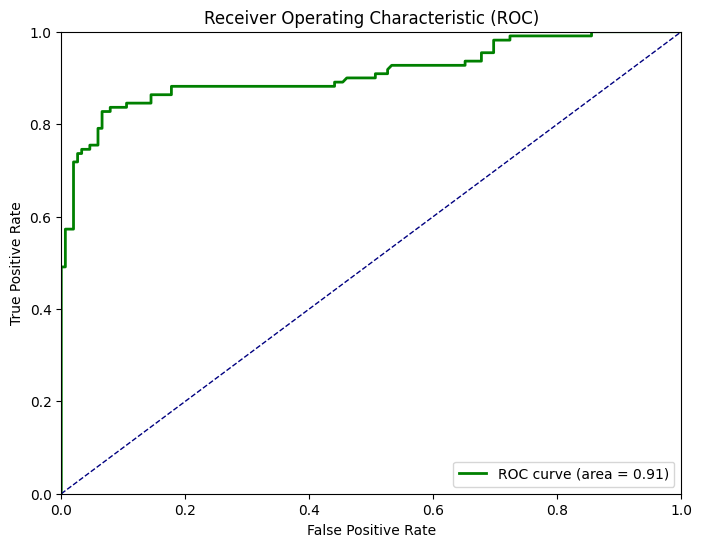

In [104]:
#Curva ROC y AUC
#fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, model_rlog.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **KNN Vecinos más cercanos**

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
#instanciemos y entrenemos el modelo
model_knn = KNeighborsClassifier(n_neighbors=10,weights='uniform')
model_knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [120]:
#Predecimos los valores de Y en el set de testeo
Y_pred = model_knn.predict(X_test)

In [124]:
#Coeficientes del modelo: ¿por qué arroja error?
pd.DataFrame(model_knn.coef_[0], X.columns,
            columns=['coeficiente'])

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [126]:
matriz = confusion_matrix(Y_test, Y_pred)

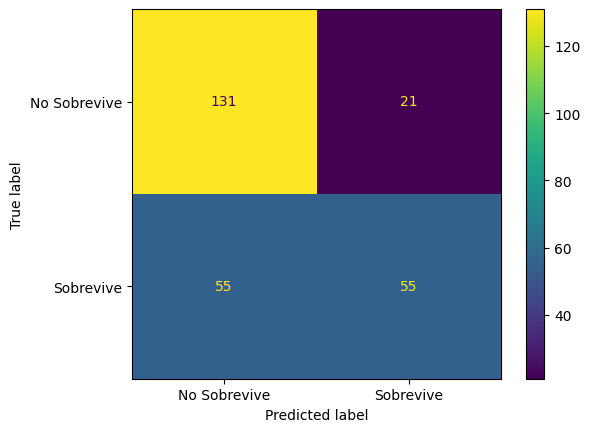

In [127]:
#Graficamos matriz de confusion
class_names = ['No Sobrevive', 'Sobrevive']

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=class_names)
disp.plot()

In [128]:
#Accuracy = TP+TN / P+N
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy.round(2),'%')

#Precision = TP / TP+FP
precision = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision.round(2),'%')

#Recall o Sensitivity = TP / TP+FN
recall = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall.round(2),'%')

Accuracy:  70.99 %
Precision:  72.37 %
Sensitivity:  50.0 %


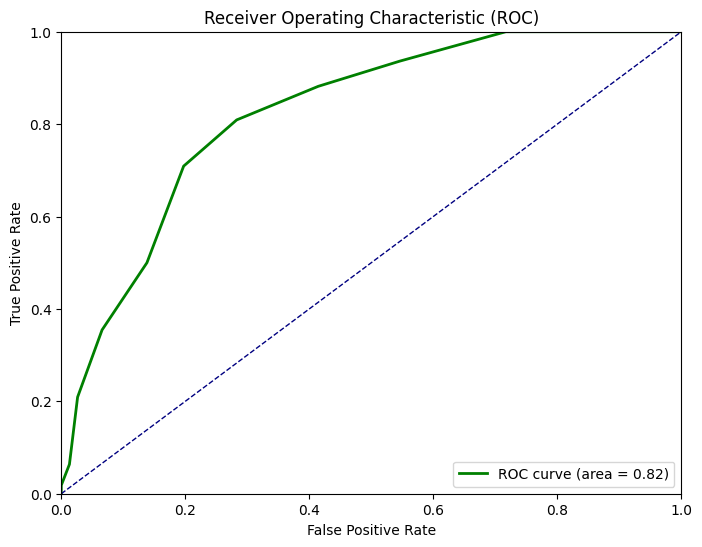

In [129]:
#Curva ROC y AUC
#fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, model_knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()